# Assignment 1 - Homework 3 - PUI2015
---
### Arno Amabile - September 30, 2015

In [1]:
import os
import numpy as np
%pylab inline
from scipy.stats import norm, kurtosis

import pylab as pl
import json
s = json.load( open('fbb_matplotlibrc.json') )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


### Choice of distributions, mean and parameters

In [2]:
distributions = ['pois', 'gaus', 'chisq', 'geom', 'gamma', 'bino']
mymean=111.0

In [3]:
# I set up a dictionary of the different parameters for the distributions 
# Except for the binomial: I need the sample size to adjust the parameter so that mean = mymean

param = {'pois': mymean, 'gaus': mymean, 'chisq': mymean, 'geom': 1/mymean, 'gamma_k':mymean/3, 'gamma_t':3, 'bino':'tbd'}
param

{'bino': 'tbd',
 'chisq': 111.0,
 'gamma_k': 37.0,
 'gamma_t': 3,
 'gaus': 111.0,
 'geom': 0.009009009009009009,
 'pois': 111.0}

### Choice of sample sizes & set up of the dictionaries to store the results

* I want to have 100 sample sizes, but with most of them smaller than 1000, hence the "append" strategy
* The mean of the binomial distribution is equal to Np, with N the sample size, and p a probability
    * To ensure $p \in [0,1]$, I want $N > mymean$
    

In [4]:
np.random.seed(1913) 
mysize_a = np.random.randint(mymean,1000,90)
mysize_b = np.random.randint(1000,2000,10)
mysize = np.append(mysize_a, mysize_b)

md={}
means={}
for dist in distributions:
    md[dist]={}
    means[dist]={}

### Generate the distributions

In [5]:
for N in mysize:
    md['pois'][N] = np.random.poisson(lam=param['pois'], size=N)
    
for N in mysize:
    md['gaus'][N] = np.random.normal(loc=param['gaus'], size=N)

for N in mysize:
    md['chisq'][N] = np.random.chisquare(param['chisq'], size=N)

for N in mysize:
    md['geom'][N] = np.random.geometric(param['geom'], size=N)
    
for N in mysize:
    md['gamma'][N] = np.random.gamma(param['gamma_k'], scale=param['gamma_t'], size=N)

for N in mysize:
    md['bino'][N] = np.random.binomial(N, mymean/N, size=N)

### Plot Sample mean against Sample size

As expected, the sample mean is closer to the "true" mean when the sample is bigger (sample size larger). This is an illustration of the **Law of Large Numbers**.

*Note: The style of the plots is from Federica Bianco*

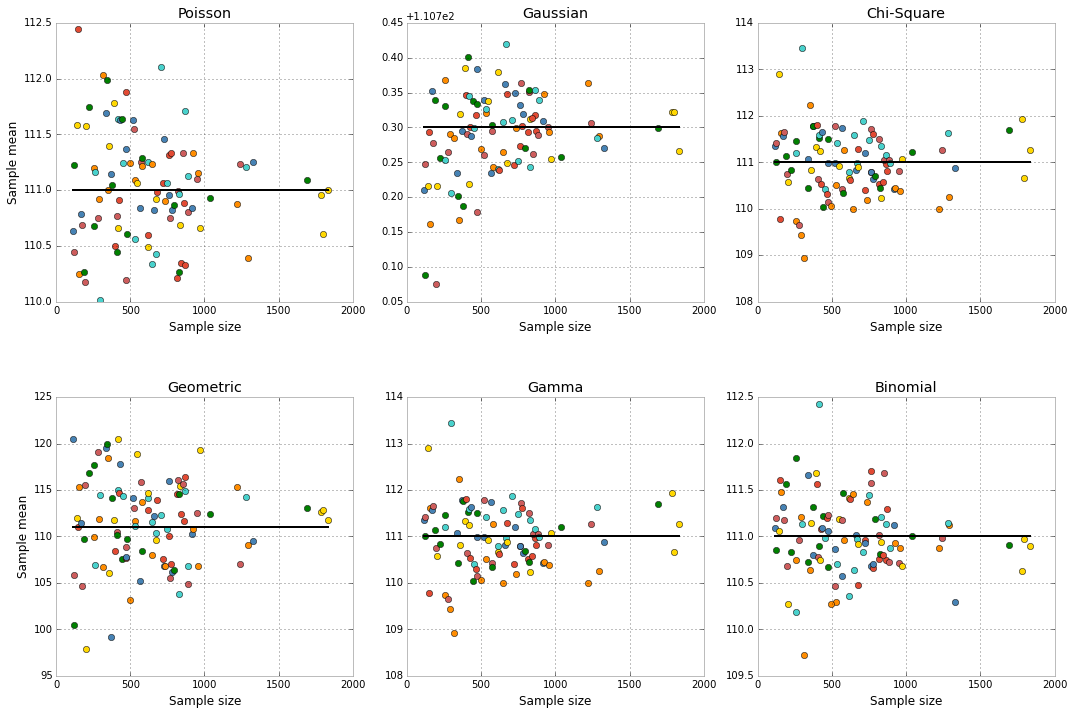

In [6]:
mu_N = pl.figure(figsize=(15,10))

pois = mu_N.add_subplot(231)
for N in md['pois'].iterkeys():
    means['pois'][N] = md['pois'][N].mean()    
    pois.plot(N, means['pois'][N], 'o')
    pois.set_ylabel('Sample mean')
    pois.set_xlabel('Sample size')
    pois.set_title('Poisson')
    pois.plot([min(mysize), max(mysize)],[param['pois'],param['pois']], 'k')
    
    
gaus = mu_N.add_subplot(232)
for N in md['gaus'].iterkeys():
    means['gaus'][N] = md['gaus'][N].mean()
    gaus.plot(N, means['gaus'][N], 'o')
    gaus.set_xlabel('Sample size')
    gaus.set_title('Gaussian')
    gaus.plot([min(mysize), max(mysize)],[param['gaus'],param['gaus']], 'k')    

chisq = mu_N.add_subplot(233)
for N in md['chisq'].iterkeys():
    means['chisq'][N] = md['chisq'][N].mean()
    chisq.plot(N, means['chisq'][N], 'o')
    chisq.set_xlabel('Sample size')
    chisq.set_title('Chi-Square')
    chisq.plot([min(mysize), max(mysize)],[param['chisq'],param['chisq']], 'k')

geom = mu_N.add_subplot(234)
for N in md['geom'].iterkeys():
    means['geom'][N] = md['geom'][N].mean()
    geom.plot(N, means['geom'][N], 'o')
    geom.set_xlabel('Sample size')
    geom.set_ylabel('Sample mean')
    geom.set_title('Geometric')
    geom.plot([min(mysize), max(mysize)],[1/param['geom'],1/param['geom']], 'k')

gamma = mu_N.add_subplot(235)
for N in md['gamma'].iterkeys():
    means['gamma'][N] = md['gamma'][N].mean()
    gamma.plot(N, means['chisq'][N], 'o')
    gamma.set_xlabel('Sample size')
    gamma.set_title('Gamma')
    gamma.plot([min(mysize), max(mysize)],[param['gamma_k']*param['gamma_t'],param['gamma_k']*param['gamma_t']], 'k')

bino = mu_N.add_subplot(236)
for N in md['bino'].iterkeys():
    means['bino'][N] = md['bino'][N].mean()
    bino.plot(N, means['bino'][N], 'o')
    bino.set_xlabel('Sample size')
    bino.set_title('Binomial')
    bino.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

pl.tight_layout(h_pad=5.0)

### Plot of the means for all distributions

Kurtosis of the distribution of means: 12.18


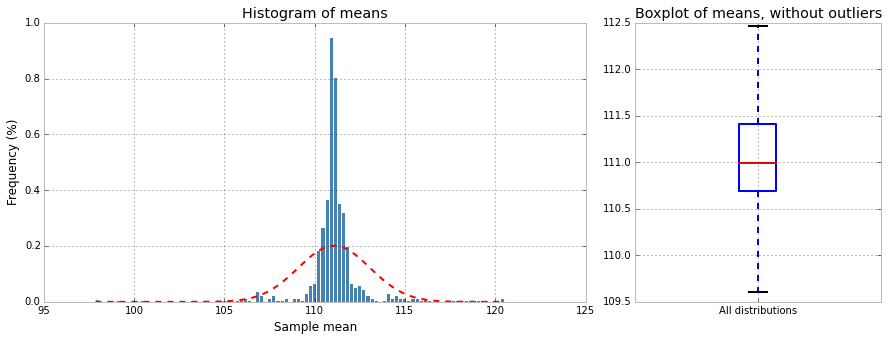

In [7]:
allmeans=[]
for dist in distributions:
    for n in means[dist]:
        allmeans.append(means[dist][n])
        
# I add a "best fit" line with a "normal" shape
(mu, sigma) = norm.fit(allmeans)
xfit = linspace(np.min(allmeans),np.max(allmeans),100)
yfit = mlab.normpdf(xfit, mu, sigma)
        
fig = plt.figure(1, figsize=(15, 5))

ax1 = plt.subplot2grid((1,3), (0,0), colspan=2)
ax1.hist(allmeans,bins=100, normed=True)
ax1.plot(xfit, yfit, 'r--', linewidth=2)
ax1.set_xlabel('Sample mean')
ax1.set_ylabel('Frequency (%)')
ax1.set_title('Histogram of means')

ax2 = plt.subplot2grid((1,3), (0,2))
ax2.boxplot(allmeans, 0, '')
ax2.set_xticklabels(['All distributions'])
ax2.set_title('Boxplot of means, without outliers')

print "Kurtosis of the distribution of means: %.2f" %kurtosis(allmeans)

The high value of the kurtosis confirms what we see on the histogram: the distribution of means is very concentrated around the mean.